In [32]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img
import matplotlib.pyplot as plt

In [33]:
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

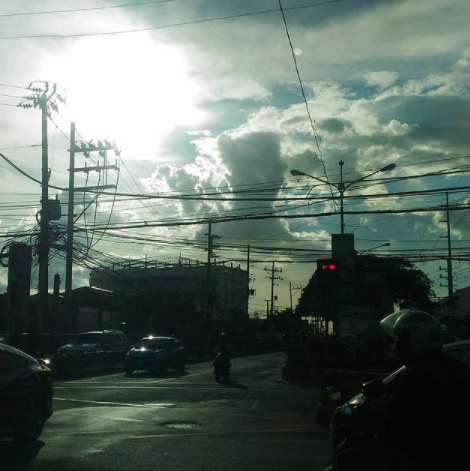

In [34]:
dark_image = imread('dataset/img.png')
img1 = array_to_img(dark_image)
img1

In [35]:
dark_image_grey = rgb2gray(dark_image)
plt.figure(num=None, figsize=(10, 8), dpi=80)
plt.imshow(dark_image_grey, cmap='gray')

In [36]:
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')

In [37]:
def fourier_masker_ver(image, i):
    f_size = 15
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    dark_image_grey_fourier[:250, 225:245] = i
    dark_image_grey_fourier[-250:,225:245] = i
    fig, ax = plt.subplots(1,3,figsize=(25,25))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(rgb2gray(image), cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size);
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), 
                     cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', 
                     fontsize = f_size);
    
fourier_masker_ver(dark_image, 1)

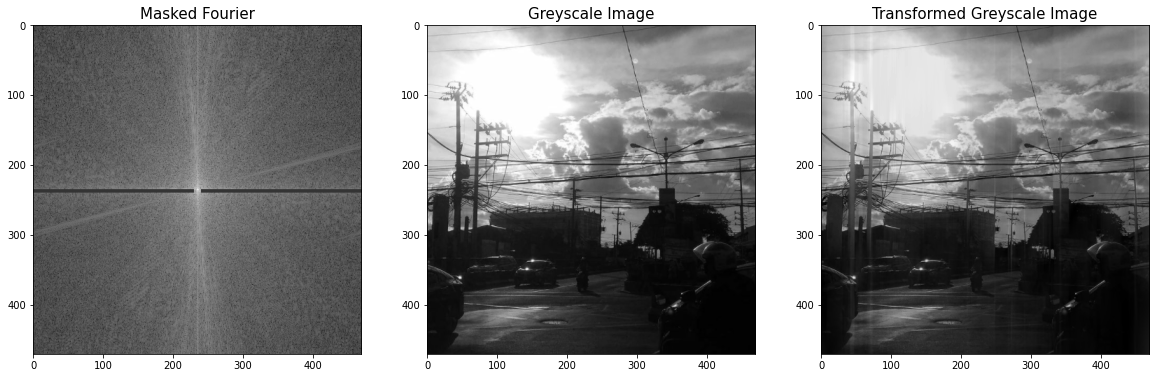

In [38]:
def fourier_masker_hor(image, i):
    f_size = 15
    dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    dark_image_grey_fourier[235:240, :230] = i
    dark_image_grey_fourier[235:240,-230:] = i
    fig, ax = plt.subplots(1,3,figsize=(20,20))
    ax[0].imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(rgb2gray(image), cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size);
    ax[2].imshow(abs(np.fft.ifft2(dark_image_grey_fourier)), 
                     cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', 
                     fontsize = f_size);
fourier_masker_hor(dark_image, 1)

In [39]:
def fourier_transform_rgb(image):
    f_size = 25
    transformed_channels = []
    for i in range(3):
        rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
        rgb_fft[:225, 230:240] = 1
        rgb_fft[-225:,230:240] = 1
        transformed_channels.append(abs(np.fft.ifft2(rgb_fft)))
    
    final_image = np.dstack([transformed_channels[0].astype(int), 
                             transformed_channels[1].astype(int), 
                             transformed_channels[2].astype(int)])
    
    fig, ax = plt.subplots(1, 2, figsize=(17,12))
    ax[0].imshow(image)
    ax[0].set_title('Original Image', fontsize = f_size)
    ax[0].set_axis_off()
    
    ax[1].imshow(final_image)
    ax[1].set_title('Transformed Image', fontsize = f_size)
    ax[1].set_axis_off()
    
    fig.tight_layout()
fourier_transform_rgb(dark_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


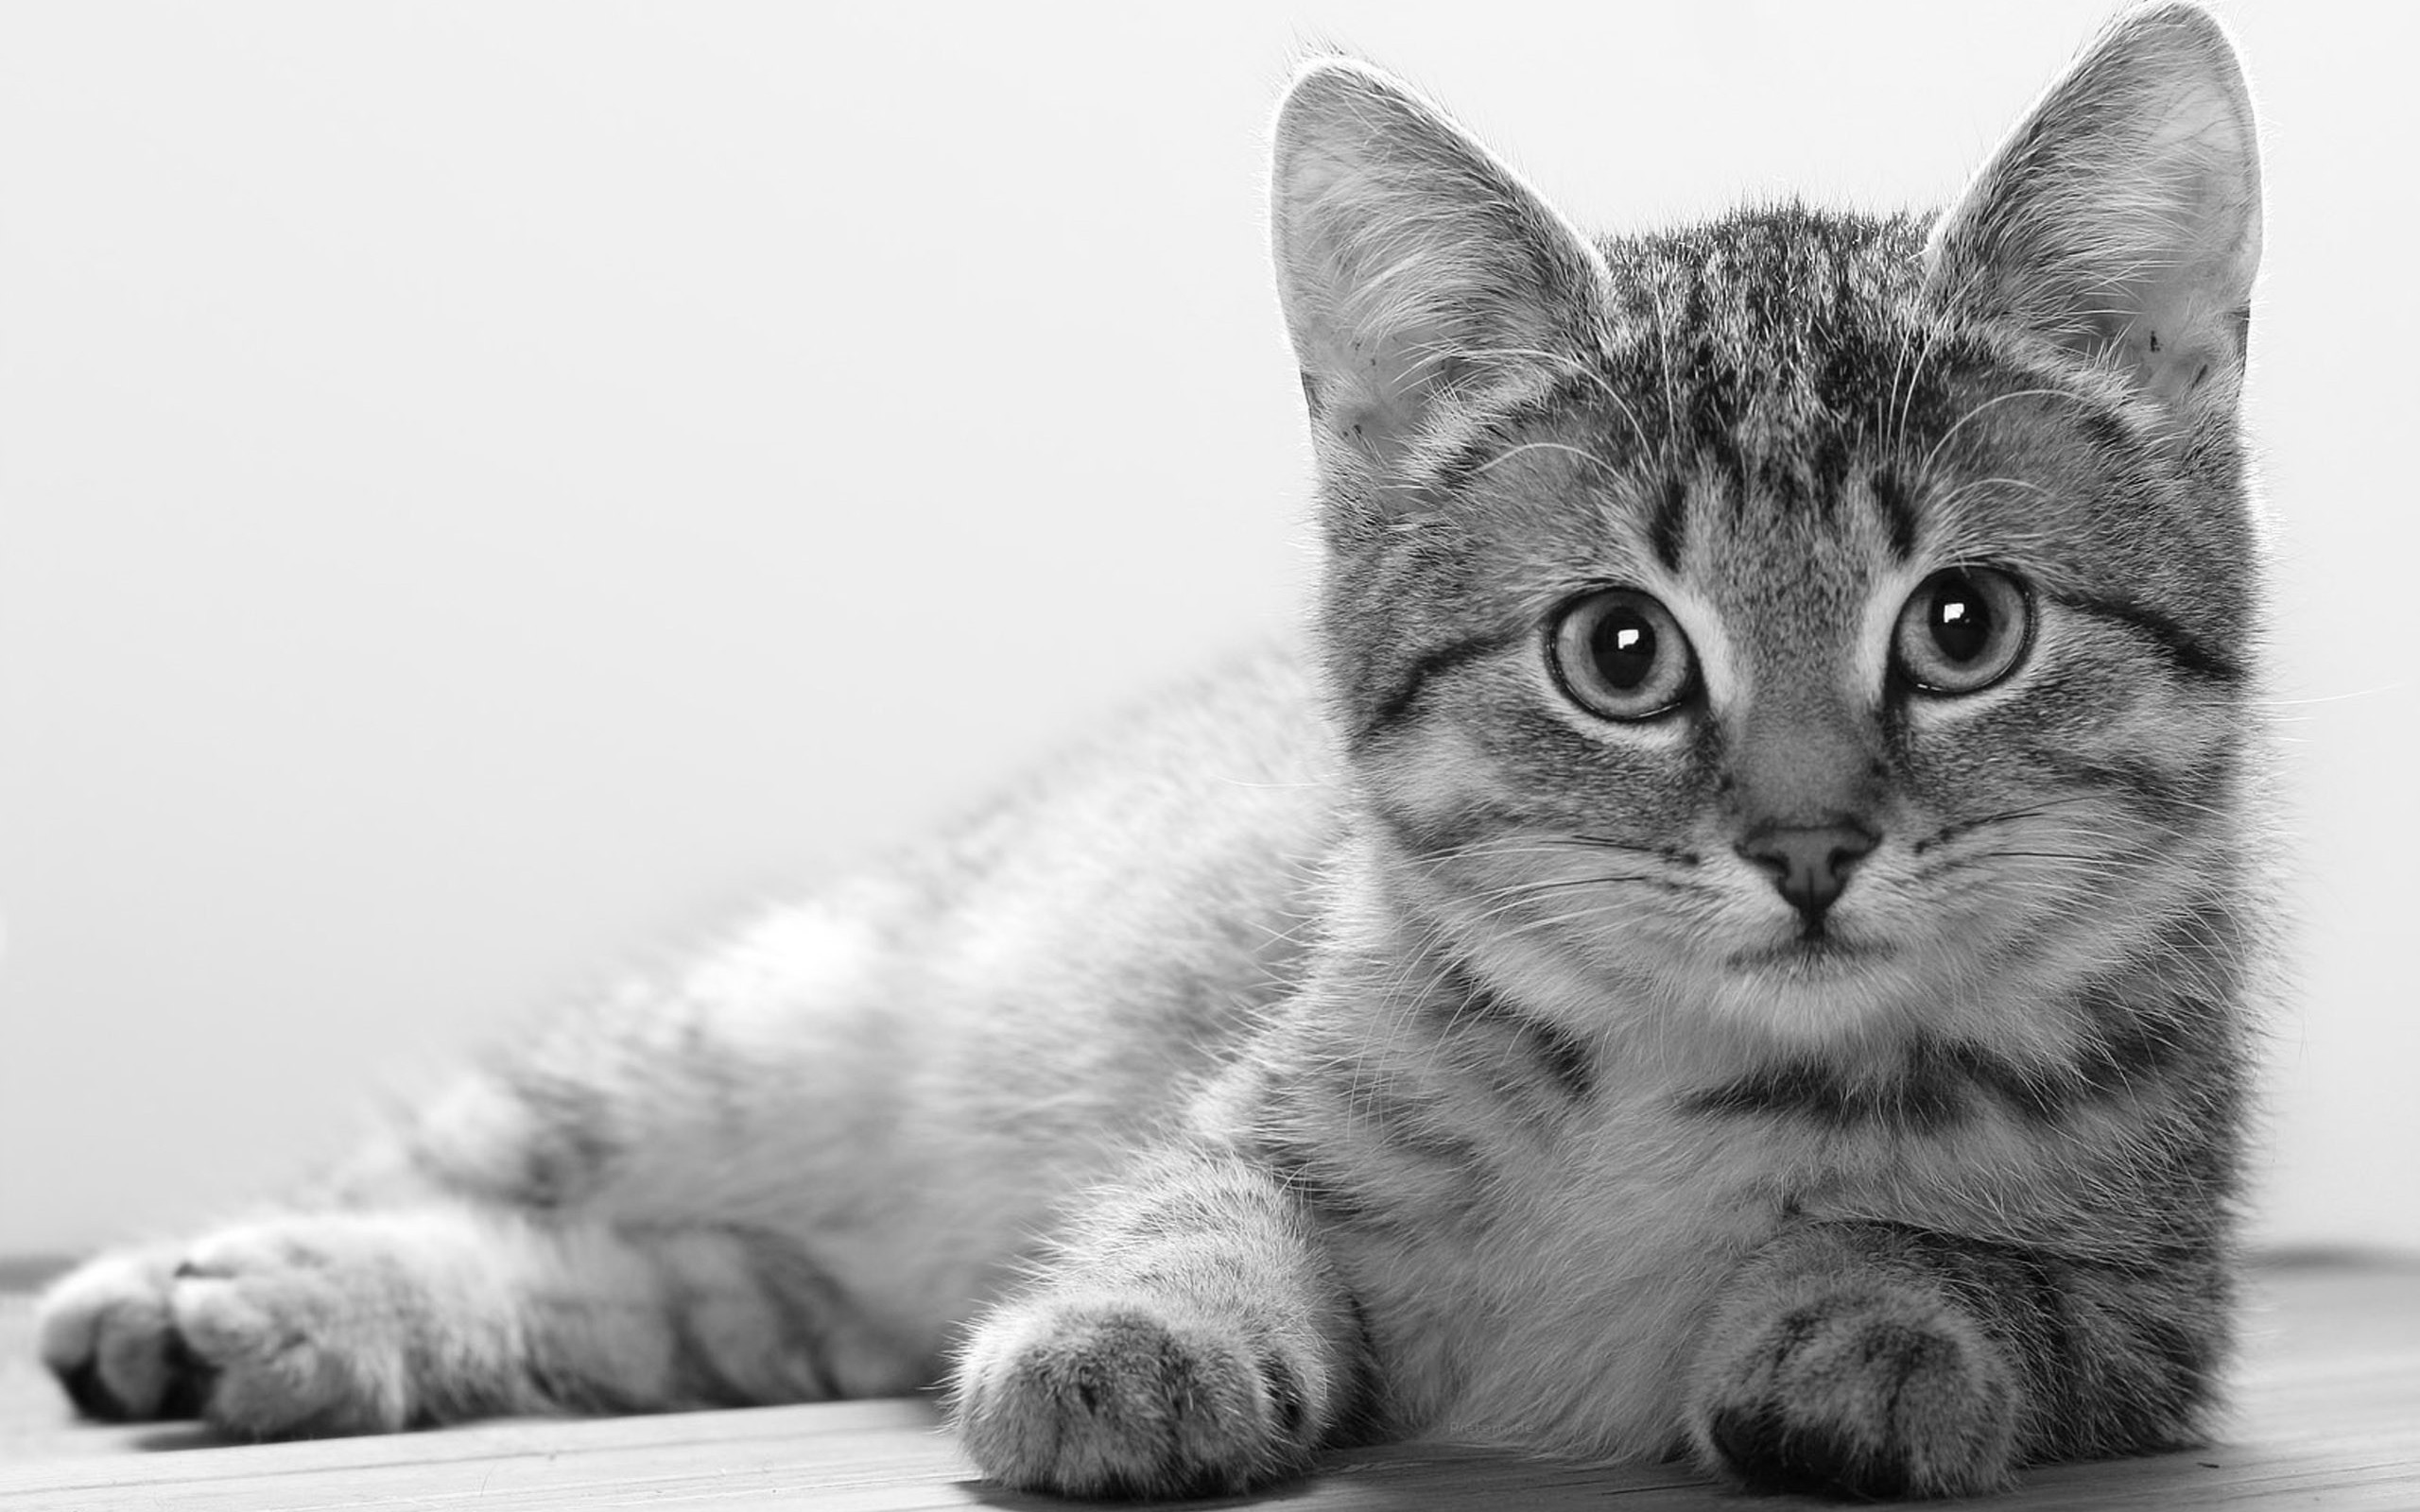

In [40]:
# rgb to black and white
img = load_img('dataset\single_prediction\cat_or_dog_2.jpg')
x = img_to_array(img)
gray = tf.image.rgb_to_grayscale(img)
y = array_to_img(gray)
y

In [41]:
x = img_to_array(img)
x = x.reshape((1,)+x.shape)
x

array([[[[239., 239., 239.],
         [239., 239., 239.],
         [239., 239., 239.],
         ...,
         [245., 245., 245.],
         [245., 245., 245.],
         [245., 245., 245.]],

        [[239., 239., 239.],
         [239., 239., 239.],
         [239., 239., 239.],
         ...,
         [245., 245., 245.],
         [245., 245., 245.],
         [245., 245., 245.]],

        [[239., 239., 239.],
         [239., 239., 239.],
         [239., 239., 239.],
         ...,
         [245., 245., 245.],
         [245., 245., 245.],
         [245., 245., 245.]],

        ...,

        [[240., 223., 215.],
         [240., 223., 215.],
         [239., 222., 214.],
         ...,
         [215., 183., 162.],
         [217., 182., 162.],
         [217., 182., 162.]],

        [[241., 224., 216.],
         [240., 223., 215.],
         [240., 223., 215.],
         ...,
         [218., 183., 163.],
         [218., 183., 163.],
         [219., 184., 164.]],

        [[240., 223., 215.],
       

In [42]:
datagen = ImageDataGenerator(brightness_range=[0.15,2.0])
train_generator = datagen.flow(x, batch_size=1)
rows = 5
columns = 4
fig, axes = plt.subplots(rows,columns)
for r in range(rows):
    for c in range(columns):
        image_batch = train_generator.next()
        image = image_batch[0].astype('uint8')
        axes[r,c].imshow(image)
fig.set_size_inches(15,10)

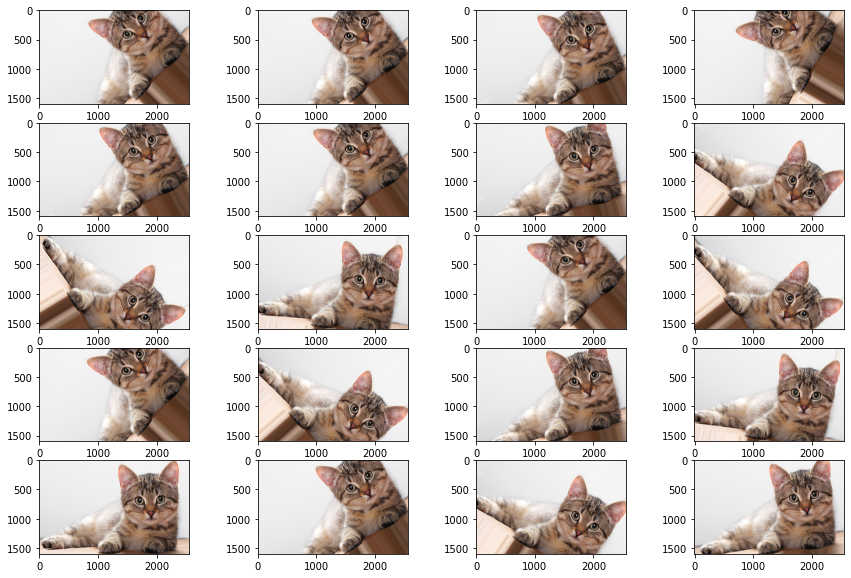

In [43]:
datagen = ImageDataGenerator(rotation_range=60)
train_generator = datagen.flow(x)
rows = 5
columns = 4
fig, axes = plt.subplots(rows,columns)
for r in range(rows):
    for c in range(columns):
        image_batch = train_generator.next()
        image = image_batch[0].astype('uint8')
        axes[r,c].imshow(image)
fig.set_size_inches(15,10)

In [44]:
datagen = ImageDataGenerator(zoom_range=0.3)
train_generator = datagen.flow(x)
rows = 5
columns = 4
fig, axes = plt.subplots(rows,columns)
for r in range(rows):
    for c in range(columns):
        image_batch = train_generator.next()
        image = image_batch[0].astype('uint8')
        axes[r,c].imshow(image)
fig.set_size_inches(15,10)

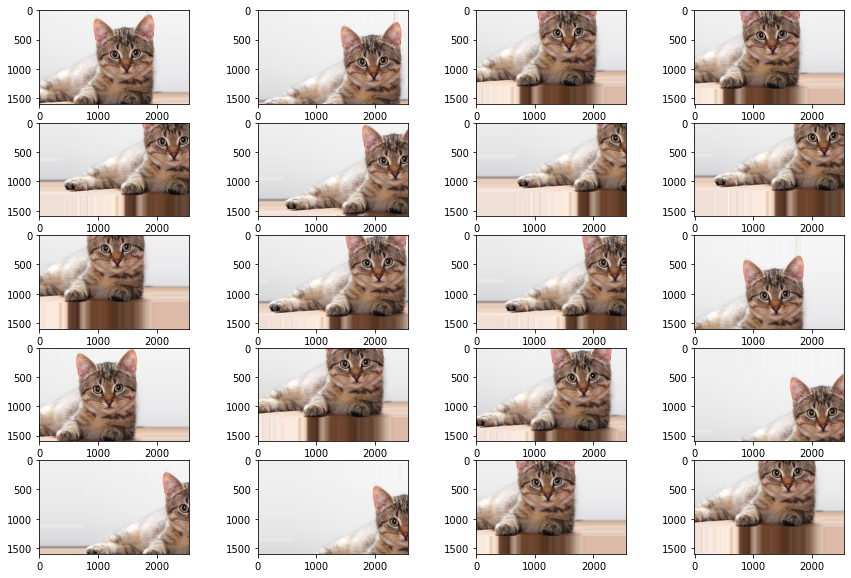

In [45]:
datagen = ImageDataGenerator(width_shift_range=0.3,height_shift_range=0.3)
train_generator = datagen.flow(x)
rows = 5
columns = 4
fig, axes = plt.subplots(rows,columns)
for r in range(rows):
    for c in range(columns):
        image_batch = train_generator.next()
        image = image_batch[0].astype('uint8')
        axes[r,c].imshow(image)
fig.set_size_inches(15,10)